# EDA : Standford Dogs Dataset 


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt 

from common_params import data_dir
import scipy.io
import fnmatch
import pandas as pd 
import cv2 # opencv

# Number of images per files 



In [2]:
image_dir = data_dir + "Images\\"
data = pd.DataFrame()

for folder in os.scandir(image_dir): 
    folder_name = folder.name
    dog_breed = folder.name.split('-')[1]

    if folder.is_dir : 
        cnt = len(fnmatch.filter(os.scandir(folder), "*.*"))
    data = data.append({'dog_breed' : dog_breed, 'folder_name' :folder.name, 'image_count' : cnt },ignore_index=True)

    

# Dataset count

In [3]:
data.head()

,dog_breed,folder_name,image_count
0,Chihuahua,n02085620-Chihuahua,152.0
1,Japanese_spaniel,n02085782-Japanese_spaniel,185.0
2,Maltese_dog,n02085936-Maltese_dog,252.0
3,Pekinese,n02086079-Pekinese,149.0
4,Shih,n02086240-Shih-Tzu,214.0


In [4]:

data = data.sort_values(by="image_count",ascending=False)

In [5]:
data.describe()

,image_count
count,120.000000
mean,171.500000
std,23.220898
min,148.000000
25%,152.750000
50%,159.500000
75%,186.250000
max,252.000000


In [6]:
nbq75 = data[data['image_count'] > data['image_count'].quantile(0.75)]['image_count'].count()
nbq25 = data[data['image_count'] > data['image_count'].quantile(0.25)]['image_count'].count()
print(f"Number of breed with data above the third quantile : {nbq75}")
print(f"Number of breed with data above the first quantile : {nbq25}")

Number of breed with data above the third quantile : 30
Number of breed with data above the first quantile : 90


In [7]:
selected_breed = data[data['image_count'] > data['image_count'].quantile(0.75)]
selected_breed.count().values[0]

30

In [8]:
selected_breed.to_csv("selected_breed.csv")

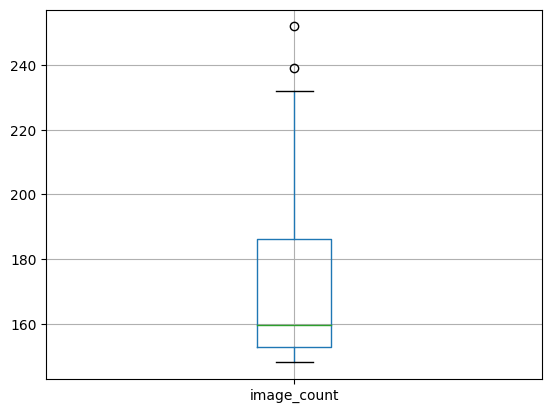

In [9]:
data.boxplot()
plt.show()

In [10]:
total_image_number = int(data["image_count"].sum())
image_number_min = int(data["image_count"].min())
image_number_max = int(data["image_count"].max())
image_number_med = int(data["image_count"].median())
print(f"Standford Dog dataset image number : { total_image_number }")
print(f"with {data.shape[0]} dog breeds, each containing \
from {image_number_min} to {image_number_max} images with a median of {image_number_med} images")

Standford Dog dataset image number : 20580
with 120 dog breeds, each containing from 148 to 252 images with a median of 159 images


In [11]:
data.head()

,dog_breed,folder_name,image_count
2,Maltese_dog,n02085936-Maltese_dog,252.0
9,Afghan_hound,n02088094-Afghan_hound,239.0
26,Scottish_deerhound,n02092002-Scottish_deerhound,232.0
107,Pomeranian,n02112018-Pomeranian,219.0
88,Bernese_mountain_dog,n02107683-Bernese_mountain_dog,218.0


In [12]:
def get_image_from_breed(data, breed): 
    folder = data[data["dog_breed"] == breed]["folder_name"].values[0]
    redboneDir  = image_dir + folder
    image_path = os.path.join(redboneDir , os.listdir(redboneDir)[0])
    img = cv2.imread(image_path)
    return img 


# Top four breed 

In [13]:
data.head(4)

,dog_breed,folder_name,image_count
2,Maltese_dog,n02085936-Maltese_dog,252.0
9,Afghan_hound,n02088094-Afghan_hound,239.0
26,Scottish_deerhound,n02092002-Scottish_deerhound,232.0
107,Pomeranian,n02112018-Pomeranian,219.0


In [14]:
breed_idx = data.head(4).index
data.iloc[breed_idx[0]]

dog_breed                Scottish_deerhound
folder_name    n02092002-Scottish_deerhound
image_count                           232.0
Name: 26, dtype: object

In [15]:
data.iloc[breed_idx[0]]['dog_breed']

'Scottish_deerhound'

In [16]:
data.head(4)

,dog_breed,folder_name,image_count
2,Maltese_dog,n02085936-Maltese_dog,252.0
9,Afghan_hound,n02088094-Afghan_hound,239.0
26,Scottish_deerhound,n02092002-Scottish_deerhound,232.0
107,Pomeranian,n02112018-Pomeranian,219.0


In [17]:
N, M = 2,2
data.head(N+M)['dog_breed'].values
breed_idx = data.head(N+M).index
fig, axs = plt.subplots(N,M)
cnt = 0 
for i in range(N) : 
    for j in range(M) : 
        dog_info = data.loc[breed_idx[cnt]]
        axs[i,j].imshow(cv2.cvtColor(get_image_from_breed(data, dog_info['dog_breed'] ),cv2.IMREAD_ANYCOLOR))
        axs[i,j].set_title(f"{dog_info['dog_breed']},  {int(dog_info['image_count'])}")
        axs[i,j].axis("off")
        cnt = cnt + 1 

# Image size

In [18]:
breed_nb = data.shape[0]
dog_img_size = pd.DataFrame()
for i in range(breed_nb) : 
    
    dog_folder = os.path.join(image_dir, data.loc[i]["folder_name"])
    dog_breed = data.loc[i]["dog_breed"]
    for img in os.scandir(dog_folder) : 
        img_path = os.path.join(dog_folder, img.name)
        img_read = cv2.imread(img_path)
        height, width, channels = img_read.shape
        dog_img_size = dog_img_size.append({'breed' : dog_breed, 'height' : height, 'width': width,'channels' : channels}, ignore_index=True)


In [19]:
dog_img_size.describe()

,height,width,channels
count,20580.000000,20580.000000,20580.0
mean,385.861224,442.531876,3.0
std,124.863446,142.792308,0.0
min,100.000000,97.000000,3.0
25%,333.000000,361.000000,3.0
50%,375.000000,500.000000,3.0
75%,453.000000,500.000000,3.0
max,2562.000000,3264.000000,3.0


All images are 3 channels, meaning colored images, however they do not have the same size.

In [20]:
plt.hist(dog_img_size[["height","width"]],label= ["height","width"])
plt.legend()
plt.plot()

[]

## Using annotation 

In [21]:
annotation_dir = os.path.join(data_dir,"Annotation")

In [29]:
test_file = "C:\dev\image_classification\data\Annotation\\n02085620-Chihuahua\\n02085620_7"

In [25]:
import xml.etree.ElementTree as ET
tree = ET.parse(test_file)
root = tree.getroot()

In [26]:
root.tag

'annotation'

In [40]:
for obj in root.findall('object'):
    print(obj)
    for bndbox in obj :
        print(bndbox)
        print(bndbox.get('name').text)
    bndbox = obj.get('bndbox').text
    bndbox_ymin = obj.get('ymin')
    print(bndbox, bndbox_ymin)


<Element 'object' at 0x00000178963E7EA8>
<Element 'name' at 0x00000178963E7EF8>


AttributeError: 'NoneType' object has no attribute 'text'

In [93]:

# Import the required modules
import xmltodict
import pprint

# Open the file and read the contents
with open(test_file, 'r', encoding='utf-8') as file:
    my_xml = file.read()

# Use xmltodict to parse and convert 
# the XML document
my_dict = xmltodict.parse(my_xml)

# Print the dictionary
pprint.pprint(my_dict, indent=2)

{ 'annotation': { 'filename': 'n02085620_7',
                  'folder': '02085620',
                  'object': [ { 'bndbox': { 'xmax': '192',
                                            'xmin': '71',
                                            'ymax': '180',
                                            'ymin': '1'},
                                'difficult': '0',
                                'name': 'Chihuahua',
                                'pose': 'Unspecified',
                                'truncated': '0'},
                              { 'bndbox': { 'xmax': '192',
                                            'xmin': '71',
                                            'ymax': '180',
                                            'ymin': '1'},
                                'difficult': '0',
                                'name': 'Chihuahua',
                                'pose': 'Unspecified',
                                'truncated': '0'}],
                  'segment':

In [106]:
def get_number_of_dog_per_image(): 
    breed_nb = data.shape[0]
    nb_dog = pd.DataFrame()
    for i in range(breed_nb) : 
        
        dog_folder = os.path.join(annotation_dir, data.loc[i]["folder_name"])
        dog_breed = data.loc[i]["dog_breed"]
        for img in os.scandir(dog_folder) : 
            annotation_path = os.path.join(dog_folder, img.name)
            # Open the file and read the contents
            with open(annotation_path, 'r', encoding='utf-8') as file:
                my_xml = file.read()
            my_dict = xmltodict.parse(my_xml)
            breeds = []
            objects = my_dict["annotation"]["object"]
            print(objects)
            try :
                objects.get("name")
                nb_dog = 1 
            except : 
                nb_dog = len(my_dict["annotation"]["object"])
            print(nb_dog)
            if nb_dog == 1 : 
                print(my_dict["annotation"]["object"]["name"])
                breeds.append( my_dict["annotation"]["object"]["name"])
            else : 
                for i in range(nb_dog) : 
                    print(my_dict["annotation"]["object"][i]["name"])

                breeds.append( my_dict["annotation"]["object"][i]["name"])
            nb_dog = nb_dog.append({'number_of_dog' : len(my_dict["annotation"]["object"]),\
                                    'breeds' : breeds},ignore_index=True)
    return nb_dog


In [91]:
my_dict["annotation"]["object"]

{'name': 'Chihuahua',
 'pose': 'Unspecified',
 'truncated': '0',
 'difficult': '0',
 'bndbox': {'xmin': '71', 'ymin': '1', 'xmax': '192', 'ymax': '180'}}

In [107]:
nb_dog = get_number_of_dog_per_image()

{'name': 'Chihuahua', 'pose': 'Unspecified', 'truncated': '0', 'difficult': '0', 'bndbox': {'xmin': '25', 'ymin': '10', 'xmax': '276', 'ymax': '498'}}
1
Chihuahua


AttributeError: 'int' object has no attribute 'append'

In [84]:
my_dict["annotation"]["object"]

{'name': 'Chihuahua',
 'pose': 'Unspecified',
 'truncated': '0',
 'difficult': '0',
 'bndbox': {'xmin': '71', 'ymin': '1', 'xmax': '192', 'ymax': '180'}}

In [60]:
with open(test_file, 'r', encoding='utf-8') as file:
    my_xml = file.read()

In [62]:
my_xml.keys()

AttributeError: 'str' object has no attribute 'keys'

In [59]:
img_description = {}
for obj in root.iter('object'):

    print(obj.tag)
    name = obj.find("name").text
    name = obj.find("pose").text
    name = obj.find("name").text
    name = obj.find("truncated").text
    name = obj.find("difficult").text
    xmin = obj.find("xmin").text
    ymin = obj.find("ymin").text
    xmax = obj.find("xmax").text
    ymax = obj.find("ymax").text
    print(name)
    img_description.append{
        'nam'
    }
    # print(element) 
    # name = obj.get("name")
    # pose = obj.get("pose")
    # print(name)

object
Chihuahua


In [41]:
[elem.tag for elem in root.iter()]

['annotation',
 'folder',
 'filename',
 'source',
 'database',
 'size',
 'width',
 'height',
 'depth',
 'segment',
 'object',
 'name',
 'pose',
 'truncated',
 'difficult',
 'bndbox',
 'xmin',
 'ymin',
 'xmax',
 'ymax']

In [31]:
for child in root:
    print(child.tag, child.attrib)
    print(child)

folder {}
<Element 'folder' at 0x00000178963E7B88>
filename {}
<Element 'filename' at 0x00000178963E7BD8>
source {}
<Element 'source' at 0x00000178963E7C28>
size {}
<Element 'size' at 0x00000178963E7D18>
segment {}
<Element 'segment' at 0x00000178963E7E58>
object {}
<Element 'object' at 0x00000178963E7EA8>


In [27]:
root.attrib

{}